# Skeletonization and network analysis in Python

We will now perform the skeletonization and analysis of the osteocyte network example image using the python library *Skan* (Skeleton analysis), published in Nunez-Iglesias et al, PeerJ 2018: 6:e4312, https://peerj.com/articles/4312/ and available here:
- https://github.com/jni/skan

A MATLAB code for skeletonization and graph conversion can be found here:
- https://github.com/phi-max/skeleton3d-matlab
- https://github.com/phi-max/skel2graph3d-matlab

The scripts for the analysis of the osteocyte network:
- https://github.com/phi-max/OCY_connectomics

The python tool TINA for osteocyte network analysis is here:
- https://bitbucket.org/refelix/tina/src/master/

## 1) Import all necessary dependencies

In [1]:
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np

from skan.pre import threshold
from skimage import morphology
from skan import draw
from skan.csr import skeleton_to_csgraph
from skan import Skeleton, summarize
import networkx as nx


## 2) Load the example image

In [2]:
file = '/storage/full-share/ocy_example.tif'
image = iio.v2.imread(file);

Did we load the right image? Let's look at the dimensions:

In [3]:
image.shape

(51, 160, 160)

Now we plot the maximum intensity projection along the Z axis, as we did in Fiji:

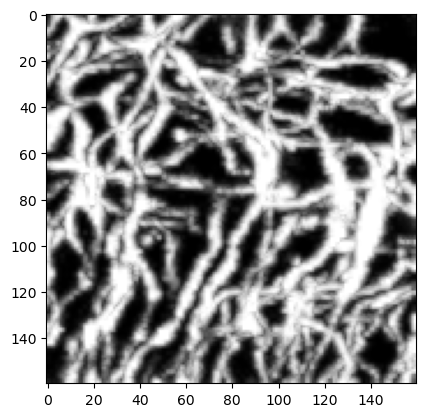

In [4]:
%matplotlib inline

fig, ax = plt.subplots()
ax.imshow(np.max(image,0), cmap='gray');

### > Exercise: plot the standard deviation:

In [5]:
#fig, ax = plt.subplots()
#ax.imshow(???);

## 3) Thresholding and skeletonization

We apply the built-in thresholding method of *Skan*:

In [6]:
smooth_radius = 5 
threshold_radius = 50
bin_img = threshold(image, sigma=smooth_radius,
                    radius=threshold_radius)

Skeletonization is done with the corresponding function in *scikit-image*:

In [7]:
skeleton = morphology.skeletonize(bin_img)

Let's plot a projection of the skeleton:

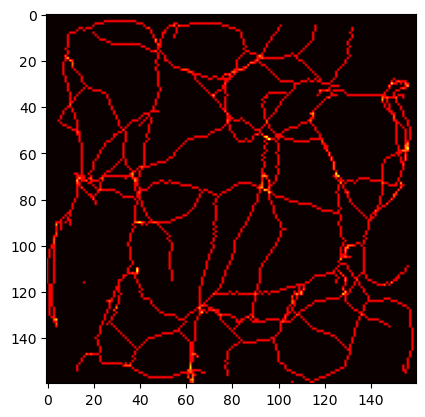

In [8]:
fig, ax = plt.subplots()
ax.imshow(np.std(skeleton,0), cmap='hot');

## 4) Conversion to graph and some statistics

In [9]:
pixel_graph, coordinates = skeleton_to_csgraph(skeleton)

In [10]:
branch_data = summarize(Skeleton(skeleton))
branch_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
0,0,58,341,17.267220,1,1.0,0.0,2,5,116,5,18,108,2,5,116,5,18,108,15.556349
1,0,74,1155,38.701885,2,1.0,0.0,2,53,100,17,35,104,2,53,100,17,35,104,23.769729
2,0,74,554,39.659525,2,1.0,0.0,2,53,100,8,67,124,2,53,100,8,67,124,28.425341
3,0,74,488,31.388176,2,1.0,0.0,2,53,100,7,76,95,2,53,100,7,76,95,24.062419
4,0,96,1100,25.731322,2,1.0,0.0,2,128,106,16,117,110,2,128,106,16,117,110,18.248288


In [ ]:
branch_data.hist(column='branch-distance', by='branch-type', bins=100);

In [ ]:
branch_data.hist(column='branch-distance', log=True)

## 5) Conversion to *networkx* graph and analysis

The possibilities of *Skan* are a bit limited in terms of analysis. We convert the pixel_graph into a *networkx* graph using the builtin function:

In [ ]:
gnx = nx.from_scipy_sparse_array(pixel_graph)

In [ ]:
gnx.degree